In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Uploading All the data files

cab_data = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Cab_Data.csv')
customer_id = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Customer_ID.csv')
transaction_id =pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\Transaction_ID.csv')

In [7]:
City = pd.read_csv('C:\\Users\\Rashmikant\\Desktop\\Data_Galcier\\DataSets\\City.csv')

In [8]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab_data.shape

(359392, 7)

In [10]:
cab_data_uni = cab_data.nunique()
print(cab_data_uni)

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64


In [11]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
transaction_id['Transaction ID'].nunique()

440098

In [14]:
UniValue = transaction_id.nunique()
print(UniValue)

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64


In [15]:
#Inner join is performed on cab_data and trasaction_id based on 'Transaction ID' Column

merged_df =pd.merge(cab_data,transaction_id, on='Transaction ID',how='inner')
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [16]:
merged_df.shape

(359392, 9)

In [17]:
cols = list(merged_df.columns.values)
print(cols)

['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode']


In [18]:
# 'Customer ID' is moved to 1st column position

first_column = merged_df.pop ('Customer ID')
merged_df.insert(0, 'Customer ID', first_column)
merged_df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card
1,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card
2,28712,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash
3,28020,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash
4,27182,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card


In [19]:
# Inner Join is performed on 'merged_df' and 'customer_id' based on 'Customer ID' column
merged_df = pd.merge(merged_df,customer_id, on = 'Customer ID', how='inner')
merged_df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,29290,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813
2,29290,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813
3,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
4,27703,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237


In [20]:
merged_df.shape

(359392, 12)

In [21]:
print(merged_df.isnull().sum())

Customer ID           0
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [22]:
df =pd.DataFrame.copy(merged_df)

In [23]:
df.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,29290,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,29290,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813
2,29290,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813
3,27703,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
4,27703,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237


In [24]:
df.shape

(359392, 12)

In [25]:
df.nunique()

Customer ID            46148
Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
dtype: int64

# Investigations
1) Is there any correlation between poulation of the  city, number of user per city and distance travelled per city.\
2) Is there any trend in profit throughout the each year.\
3) Which company is making higher profit per km?

In [27]:
#Profit Calculation

df['Profit'] = (df['Price Charged'] - df['Cost of Trip'])
print(df.head())

   Customer ID  Transaction ID Date of Travel     Company        City  \
0        29290        10000011     08-01-2016    Pink Cab  ATLANTA GA   
1        29290        10351127     21-07-2018  Yellow Cab  ATLANTA GA   
2        29290        10412921     23-11-2018  Yellow Cab  ATLANTA GA   
3        27703        10000012     06-01-2016    Pink Cab  ATLANTA GA   
4        27703        10320494     21-04-2018  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0         30.45         370.95      313.6350         Card   Male   28   
1         26.19         598.70      317.4228         Cash   Male   28   
2         42.55         792.05      597.4020         Card   Male   28   
3         28.62         358.52      334.8540         Card   Male   27   
4         36.38         721.10      467.1192         Card   Male   27   

   Income (USD/Month)    Profit  
0               10813   57.3150  
1               10813  281.2772  
2               1081

In [28]:
#Profit per Km calculation
df['Profit per KM'] = (df['Profit']/df['KM Travelled'])
print(df.head())

   Customer ID  Transaction ID Date of Travel     Company        City  \
0        29290        10000011     08-01-2016    Pink Cab  ATLANTA GA   
1        29290        10351127     21-07-2018  Yellow Cab  ATLANTA GA   
2        29290        10412921     23-11-2018  Yellow Cab  ATLANTA GA   
3        27703        10000012     06-01-2016    Pink Cab  ATLANTA GA   
4        27703        10320494     21-04-2018  Yellow Cab  ATLANTA GA   

   KM Travelled  Price Charged  Cost of Trip Payment_Mode Gender  Age  \
0         30.45         370.95      313.6350         Card   Male   28   
1         26.19         598.70      317.4228         Cash   Male   28   
2         42.55         792.05      597.4020         Card   Male   28   
3         28.62         358.52      334.8540         Card   Male   27   
4         36.38         721.10      467.1192         Card   Male   27   

   Income (USD/Month)    Profit  Profit per KM  
0               10813   57.3150       1.882266  
1               10813  2

In [29]:
#Find out the profit of each company
cab_profit = df.groupby(['Company'])[['Profit']].sum()
print(cab_profit.round())


                Profit
Company               
Pink Cab     5307328.0
Yellow Cab  44020373.0


In [30]:
# City Wise total profit 
city_profit = df.groupby(['City'])[['Profit']].sum()
print(city_profit.round())

                    Profit
City                      
ATLANTA GA        842433.0
AUSTIN TX         526701.0
BOSTON MA        1768719.0
CHICAGO IL       3387313.0
DALLAS TX        1128733.0
DENVER CO         397585.0
LOS ANGELES CA   4411709.0
MIAMI FL          758301.0
NASHVILLE TN      149532.0
NEW YORK NY     27962555.0
ORANGE COUNTY     457002.0
PHOENIX AZ        192941.0
PITTSBURGH PA      85166.0
SACRAMENTO CA     117326.0
SAN DIEGO CA     1587163.0
SEATTLE WA        604685.0
SILICON VALLEY   1316705.0
TUCSON AZ         140261.0
WASHINGTON DC    3492870.0


Text(0, 0.5, 'Profit')

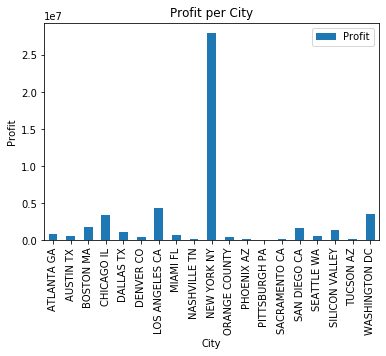

In [31]:
city_profit.plot(kind='Bar')
plt.title("Profit per City")

plt.ylabel("Profit")

In [32]:
city_dist = df.groupby(['City'])[['KM Travelled']].sum()
print(city_dist.round())

                KM Travelled
City                        
ATLANTA GA          168644.0
AUSTIN TX           109207.0
BOSTON MA           670388.0
CHICAGO IL         1281704.0
DALLAS TX           157782.0
DENVER CO            85870.0
LOS ANGELES CA     1088736.0
MIAMI FL            145418.0
NASHVILLE TN         68325.0
NEW YORK NY        2248810.0
ORANGE COUNTY        88827.0
PHOENIX AZ           45825.0
PITTSBURGH PA        29706.0
SACRAMENTO CA        53861.0
SAN DIEGO CA        460504.0
SEATTLE WA          180904.0
SILICON VALLEY      193713.0
TUCSON AZ            43230.0
WASHINGTON DC       989038.0


In [33]:
print(City)

                City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021


In [34]:
city_KM = pd.merge(City,city_dist, on = 'City', how='inner')
print(city_KM.head())

             City  Population   Users  KM Travelled
0     NEW YORK NY     8405837  302149    2248809.74
1      CHICAGO IL     1955130  164468    1281704.39
2  LOS ANGELES CA     1595037  144132    1088735.65
3        MIAMI FL     1339155   17675     145418.17
4  SILICON VALLEY     1177609   27247     193712.97


In [35]:
city_KM.corr()


,Population,Users,KM Travelled
Population,1.000000,0.815582,0.800419
Users,0.815582,1.000000,0.998921
KM Travelled,0.800419,0.998921,1.000000


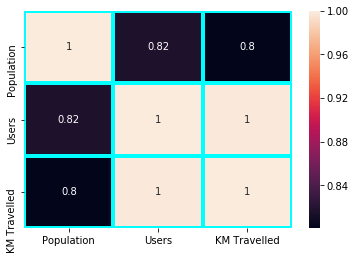

In [36]:
sns.heatmap(city_KM.corr(),annot = True, linewidths=3, linecolor='Cyan')

So,this shows that there is high correlation beteween population of the city, Cab users in the city and distance travelled by users. That means citys with more population have more cab users in turn more distance travelled. 

In [198]:
customer= df.groupby(['Customer ID'])[['Transaction ID']].count()
print(customer.head())

             Transaction ID
Customer ID                
1                        29
2                        40
3                        46
4                        26
5                        31


In [105]:
#Seperating data based on Company

df_company = df.groupby('Company')
df_company.first()

,Customer ID,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM
Company,,,,,,,,,,,,,
Pink Cab,29290,10000011,08-01-2016,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,57.3150,1.882266
Yellow Cab,29290,10351127,21-07-2018,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,281.2772,10.739870


In [199]:
#Pink Cab data
pink_cab=df_company.get_group('Pink Cab')
print(pink_cab.head())

    Customer ID  Transaction ID Date of Travel        City  KM Travelled  \
0         29290        10000011     08-01-2016  ATLANTA GA         30.45   
3         27703        10000012     06-01-2016  ATLANTA GA         28.62   
6         27703        10395626     27-10-2018  ATLANTA GA         13.39   
7         28712        10000013     02-01-2016  ATLANTA GA          9.04   
11        28020        10000014     07-01-2016  ATLANTA GA         33.17   

    Price Charged  Cost of Trip Payment_Mode Gender  Age  Income (USD/Month)  \
0          370.95       313.635         Card   Male   28               10813   
3          358.52       334.854         Card   Male   27                9237   
6          167.03       141.934         Card   Male   27                9237   
7          125.20        97.632         Cash   Male   53               11242   
11         377.40       351.602         Cash   Male   23               23327   

    Profit  Profit per KM  
0   57.315       1.882266  
3   23

In [107]:
#converting series into data frame
pink_cab = pd.DataFrame(pink_cab)
#print(pink_cab)

In [207]:
Avg_profit_pink = pink_cab['Profit per KM'].mean()
print(Avg_profit_pink)

2.769907700396573


In [112]:
 
ts = pd.DataFrame(pink_cab,columns=['Date of Travel','Profit'])
print(ts)

       Date of Travel   Profit
0          08-01-2016   57.315
3          06-01-2016   23.666
6          27-10-2018   25.096
7          02-01-2016   27.568
11         07-01-2016   25.798
12         27-10-2016   37.292
14         11-05-2018   43.190
15         03-01-2016   16.844
19         07-01-2016    9.406
20         04-09-2016   59.890
22         19-07-2017   30.084
24         03-01-2016  100.950
27         07-01-2016   88.210
30         12-01-2016   44.730
37         26-09-2017   65.700
39         06-01-2016   43.724
45         08-11-2017  176.080
46         03-01-2018  108.750
50         24-05-2018   99.800
51         21-06-2018    5.614
53         11-01-2016   95.630
55         18-05-2016  -79.088
64         06-01-2016   97.090
66         21-07-2016   33.683
75         28-04-2018  101.610
81         11-01-2016   23.610
84         28-08-2016   11.352
93         10-11-2018    8.902
95         06-01-2016   78.900
97         03-04-2016  276.350
...               ...      ...
359306  

In [200]:
ts = ts.rename(columns = {'Date of Travel': 'Date'}, inplace = False)
print(ts.head())

         Date  Profit  month  year
0  2016-01-08  57.315      1  2016
3  2016-01-06  23.666      1  2016
6  2018-10-27  25.096     10  2018
7  2016-01-02  27.568      1  2016
11 2016-01-07  25.798      1  2016


In [116]:
#ts['Date'] = pd.to_datetime(ts['Date'])
#print(ts['Date'])

ts["Date"]=pd.to_datetime(ts.Date,format='%d-%m-%Y')

In [201]:
ts.head()

,Date,Profit,month,year
0,2016-01-08,57.315,1,2016
3,2016-01-06,23.666,1,2016
6,2018-10-27,25.096,10,2018
7,2016-01-02,27.568,1,2016
11,2016-01-07,25.798,1,2016


In [150]:
ts['month'] = pd.DatetimeIndex(ts['Date']).month
ts['year'] = pd.DatetimeIndex(ts['Date']).year
print(ts.head())

         Date  Profit  month  year
0  2016-01-08  57.315      1  2016
3  2016-01-06  23.666      1  2016
6  2018-10-27  25.096     10  2018
7  2016-01-02  27.568      1  2016
11 2016-01-07  25.798      1  2016


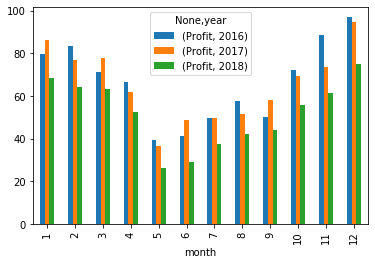

In [180]:
ts_m=ts.groupby(['month','year'])[['Profit']].mean().unstack().plot(kind='bar')
#plt.figure(figsize=(100,50))

#print(ts_m)

From above plot one can say that in Pink Cab profit starts at high but dips in May, June and again starts increasing reaches its max in december of each year.

In [162]:
ts_m = pd.DataFrame(ts_m)
print(ts_m)

               Profit
month year           
1     2016  79.776551
      2017  86.457326
      2018  68.524514
2     2016  83.310042
      2017  76.904352
      2018  64.305366
3     2016  71.325088
      2017  77.914371
      2018  63.257279
4     2016  66.606333
      2017  61.861363
      2018  52.535690
5     2016  39.279488
      2017  36.791777
      2018  26.143758
6     2016  41.100146
      2017  48.632011
      2018  29.220689
7     2016  49.841288
      2017  49.744968
      2018  37.333323
8     2016  57.910812
      2017  51.671733
      2018  42.115484
9     2016  50.416756
      2017  58.219668
      2018  44.267811
10    2016  72.020053
      2017  69.432162
      2018  55.893442
11    2016  88.445925
      2017  73.574774
      2018  61.415892
12    2016  97.118233
      2017  94.677279
      2018  75.159454


In [132]:
ts1 = ts.groupby(['Date'])[['Profit']].mean()
print(ts1.round())



            Profit
Date              
2016-01-02   117.0
2016-01-03   204.0
2016-01-04   107.0
2016-01-05   124.0
2016-01-06   102.0
2016-01-07    52.0
2016-01-08   108.0
2016-01-09   117.0
2016-01-10   106.0
2016-01-11    65.0
2016-01-12    59.0
2016-01-13    41.0
2016-01-14    38.0
2016-01-15    47.0
2016-01-16    69.0
2016-01-17    68.0
2016-01-18    57.0
2016-01-19    17.0
2016-01-20    20.0
2016-01-21    51.0
2016-01-22    47.0
2016-01-23    70.0
2016-01-24    58.0
2016-01-25    41.0
2016-01-26    42.0
2016-01-27    37.0
2016-01-28    48.0
2016-01-29    19.0
2016-01-30   108.0
2016-01-31   102.0
...            ...
2018-12-02    75.0
2018-12-03    54.0
2018-12-04    53.0
2018-12-05    49.0
2018-12-06    55.0
2018-12-07    79.0
2018-12-08    86.0
2018-12-09    60.0
2018-12-10    62.0
2018-12-11    66.0
2018-12-12    64.0
2018-12-13    61.0
2018-12-14    83.0
2018-12-15    84.0
2018-12-16    68.0
2018-12-17    60.0
2018-12-18    58.0
2018-12-19    56.0
2018-12-20    58.0
2018-12-21  

In [135]:
ts1 = pd.DataFrame(ts1)
print(ts1)

                Profit
Date                  
2016-01-02  117.302951
2016-01-03  204.241962
2016-01-04  107.147750
2016-01-05  124.226500
2016-01-06  101.607870
2016-01-07   52.275083
2016-01-08  107.506524
2016-01-09  117.273158
2016-01-10  106.155552
2016-01-11   64.834538
2016-01-12   59.387636
2016-01-13   41.257250
2016-01-14   37.611207
2016-01-15   46.778833
2016-01-16   69.104644
2016-01-17   67.996186
2016-01-18   56.526250
2016-01-19   16.936053
2016-01-20   20.148519
2016-01-21   50.679217
2016-01-22   47.439400
2016-01-23   69.810070
2016-01-24   57.968807
2016-01-25   41.405800
2016-01-26   42.123143
2016-01-27   37.247941
2016-01-28   47.912929
2016-01-29   18.936190
2016-01-30  107.734298
2016-01-31  101.579000
...                ...
2018-12-02   74.786293
2018-12-03   54.097797
2018-12-04   53.310444
2018-12-05   49.098866
2018-12-06   55.266187
2018-12-07   79.333396
2018-12-08   85.569088
2018-12-09   60.325527
2018-12-10   62.268061
2018-12-11   65.798886
2018-12-12 

In [139]:
ts1.index


DatetimeIndex(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

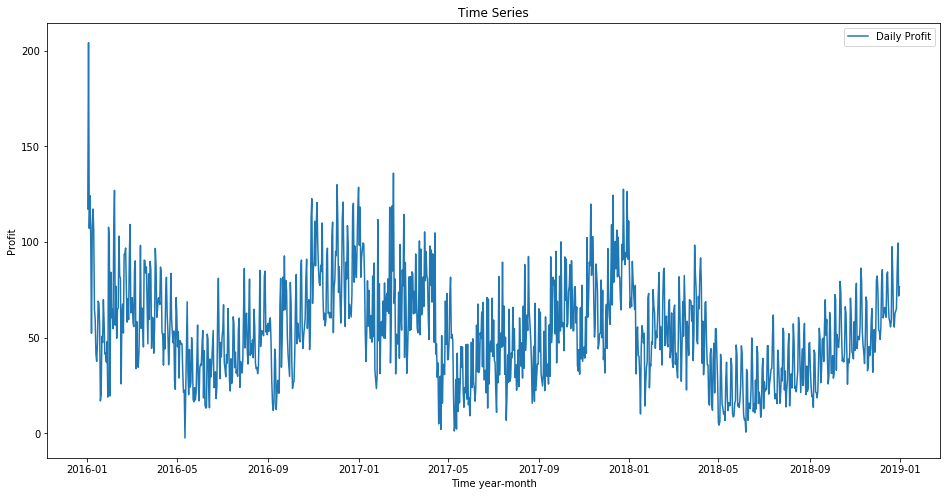

In [142]:
#plt.plot(ts1,label='profit')

plt.figure(figsize=(16,8))
plt.plot(ts1,label='Daily Profit')
plt.title('Time Series')
plt.xlabel('Time year-month')
plt.ylabel('Profit')
plt.legend(loc='best')
plt.show()

In [119]:
print(ts.dtypes)

Date      datetime64[ns]
Profit           float64
dtype: object


In [104]:
ts.index=ts['Date']
print(ts)

                 Date   Profit
Date                          
2016-08-01 2016-08-01   57.315
2016-06-01 2016-06-01   23.666
2018-10-27 2018-10-27   25.096
2016-02-01 2016-02-01   27.568
2016-07-01 2016-07-01   25.798
2016-10-27 2016-10-27   37.292
2018-11-05 2018-11-05   43.190
2016-03-01 2016-03-01   16.844
2016-07-01 2016-07-01    9.406
2016-04-09 2016-04-09   59.890
2017-07-19 2017-07-19   30.084
2016-03-01 2016-03-01  100.950
2016-07-01 2016-07-01   88.210
2016-12-01 2016-12-01   44.730
2017-09-26 2017-09-26   65.700
2016-06-01 2016-06-01   43.724
2017-08-11 2017-08-11  176.080
2018-03-01 2018-03-01  108.750
2018-05-24 2018-05-24   99.800
2018-06-21 2018-06-21    5.614
2016-11-01 2016-11-01   95.630
2016-05-18 2016-05-18  -79.088
2016-06-01 2016-06-01   97.090
2016-07-21 2016-07-21   33.683
2018-04-28 2018-04-28  101.610
2016-11-01 2016-11-01   23.610
2016-08-28 2016-08-28   11.352
2018-10-11 2018-10-11    8.902
2016-06-01 2016-06-01   78.900
2016-03-04 2016-03-04  276.350
...     

In [189]:
yellow_cab=df_company.get_group('Yellow Cab')
print(yellow_cab.head())

   Customer ID  Transaction ID Date of Travel        City  KM Travelled  \
1        29290        10351127     21-07-2018  ATLANTA GA         26.19   
2        29290        10412921     23-11-2018  ATLANTA GA         42.55   
4        27703        10320494     21-04-2018  ATLANTA GA         36.38   
5        27703        10324737     04-05-2018  ATLANTA GA          6.18   
8        28712        10079404     21-09-2016  ATLANTA GA         39.60   

   Price Charged  Cost of Trip Payment_Mode Gender  Age  Income (USD/Month)  \
1         598.70      317.4228         Cash   Male   28               10813   
2         792.05      597.4020         Card   Male   28               10813   
4         721.10      467.1192         Card   Male   27                9237   
5         138.40       87.5088         Cash   Male   27                9237   
8         704.30      494.2080         Card   Male   53               11242   

     Profit  Profit per KM  
1  281.2772      10.739870  
2  194.6480     

In [190]:
#Converting from Series to Dataframe
yellow_cab = pd.DataFrame(yellow_cab)

In [206]:
Avg_profit_yellow = yellow_cab['Profit per KM'].mean()
print(Avg_profit_yellow)

7.105507808353085


In [191]:
ts_y = pd.DataFrame(yellow_cab,columns=['Date of Travel','Profit'])
print(ts_y.head())

  Date of Travel    Profit
1     21-07-2018  281.2772
2     23-11-2018  194.6480
4     21-04-2018  253.9808
5     04-05-2018   50.8912
8     21-09-2016  210.0920


In [192]:
ts_y = ts_y.rename(columns = {'Date of Travel': 'Date'}, inplace = False)
print(ts_y.head())

         Date    Profit
1  21-07-2018  281.2772
2  23-11-2018  194.6480
4  21-04-2018  253.9808
5  04-05-2018   50.8912
8  21-09-2016  210.0920


In [193]:
ts_y["Date"]=pd.to_datetime(ts_y.Date,format='%d-%m-%Y')
print(ts_y.head())

        Date    Profit
1 2018-07-21  281.2772
2 2018-11-23  194.6480
4 2018-04-21  253.9808
5 2018-05-04   50.8912
8 2016-09-21  210.0920


In [195]:
ts_y.dtypes

Date      datetime64[ns]
Profit           float64
dtype: object

In [196]:
ts_y['month'] = pd.DatetimeIndex(ts_y['Date']).month
ts_y['year'] = pd.DatetimeIndex(ts_y['Date']).year
print(ts.head())

         Date  Profit  month  year
0  2016-01-08  57.315      1  2016
3  2016-01-06  23.666      1  2016
6  2018-10-27  25.096     10  2018
7  2016-01-02  27.568      1  2016
11 2016-01-07  25.798      1  2016


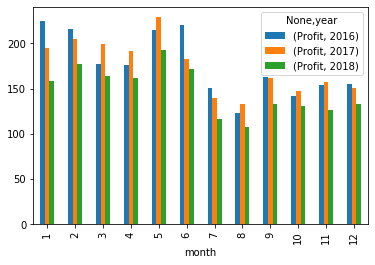

In [197]:
ts_y=ts_y.groupby(['month','year'])[['Profit']].mean().unstack().plot(kind='bar')

From above plot one can see there is no specific trend in yellow cab. Its profit is almost same alover the month in each year. 